In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS
import nltk

In [2]:
df = pd.read_csv('../data/datasets_25254_32181_reuters-newswire-2017-edited.csv')

In [3]:
df

headline_text  category
0    Southern European bond yields hit multi-week lows         3
1    BRIEF-LG sells its entire stake in unit LG Lif...         6
2    BRIEF-Golden Wheel Tiandi says unit confirms s...         3
3    BRIEF-Sunshine 100 China Holdings Dec contract...         3
4    Euro zone stocks start 2017 with new one-year ...         3
..                                                 ...       ...
994  BRIEF-HTM International to issue 1st series se...         3
995  BRIEF-Revlon says expects to eliminate about 3...         3
996                        Twitter's China chief quits         4
997  Peru demands cash from Odebrecht ahead of plea...         3
998          CORRECTED-FOREX-Dollar resumes its ascent         3

[999 rows x 2 columns]

In [7]:
label_map = {
    0: 'Politics',
    1: 'Sport',
    3: 'Economy',
    4: 'World News',
    5: 'Health',
    6: 'Technology',
}

_classes = set(df.category.value_counts()[df.category.value_counts() > 20].index)
df = df[df['category'].map(lambda x: x in _classes)]
df['category'].value_counts()

3    584
4    188
6     64
5     64
1     61
0     30
Name: category, dtype: int64

In [8]:
df['word_count'] = df['headline_text'].apply(lambda x : len(x.split()))
df['char_count'] = df['headline_text'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df['punc_count'] = df['headline_text'].apply(lambda x : len([a for a in x if a in string.punctuation]))

df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

word_count  char_count  word_density  punc_count
0            7          43      0.159091           1
1           10          47      0.208333           1
2           14          87      0.159091           1
3           10          60      0.163934           2
4           17          87      0.193182           2
5            6          35      0.166667           1
7            9          54      0.163636           1
8           12          51      0.230769           1
9           10          59      0.166667           1
10          11          52      0.207547           0

<AxesSubplot:>

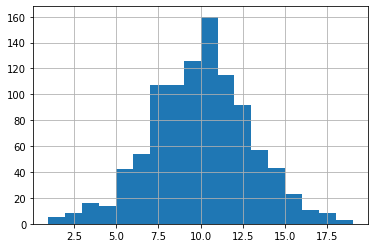

In [9]:
# most authors prefer writing headlines which contains about 10 words.
df['word_count'].hist(bins=18)

<AxesSubplot:>

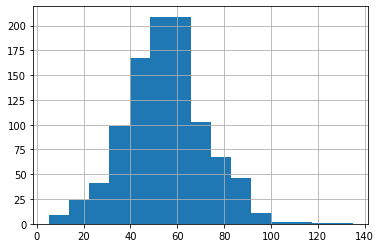

In [10]:
# most authors prefer writing headlines which contains about 50 chars.
df['char_count'].hist(bins=15)

<AxesSubplot:>

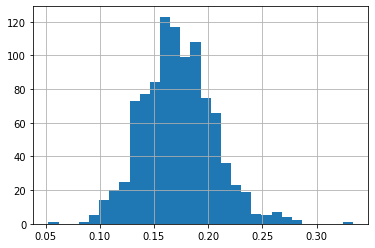

In [11]:
# High density in the center of the distribution (0.13 and 0.21)
df['word_density'].hist(bins=30)

<AxesSubplot:>

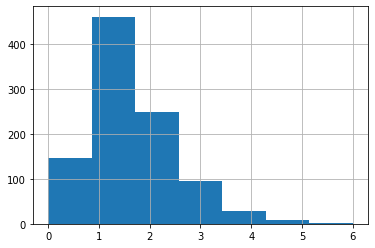

In [12]:
# Between 0-3
df['punc_count'].hist(bins=7)

In [14]:
df

headline_text  category  word_count  \
0    Southern European bond yields hit multi-week lows         3           7   
1    BRIEF-LG sells its entire stake in unit LG Lif...         6          10   
2    BRIEF-Golden Wheel Tiandi says unit confirms s...         3          14   
3    BRIEF-Sunshine 100 China Holdings Dec contract...         3          10   
4    Euro zone stocks start 2017 with new one-year ...         3          17   
..                                                 ...       ...         ...   
994  BRIEF-HTM International to issue 1st series se...         3          13   
995  BRIEF-Revlon says expects to eliminate about 3...         3          12   
996                        Twitter's China chief quits         4           4   
997  Peru demands cash from Odebrecht ahead of plea...         3          10   
998          CORRECTED-FOREX-Dollar resumes its ascent         3           4   

     char_count  word_density  punc_count  
0            43      0.159091           1  
1            47      0.208333           1  
2            87      0.159091           1  
3            60      0.163934           2  
4            87      0.193182           2  
..          ...           ...         ...  
994          85      0.151163           2  
995          70      0.169014           2  
996          24      0.160000           1  
997          48      0.204082           0  
998          38      0.102564           2  

[991 rows x 6 columns]

In [39]:
def generate_word_cloud(df):
    word_cloud = WordCloud(
        width = 800, height = 800, 
        background_color ='white', 
        stopwords = set(STOPWORDS), 
        min_font_size = 10
    ).generate(
        df.headline_text.apply(lambda x: x.lower() + ' ').sum()
    )
    
    plt.imshow(word_cloud)
    plt.title(label_map[df.category.unique()[0]])
    plt.axis("off")
    plt.show()

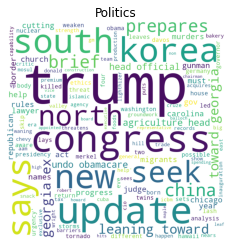

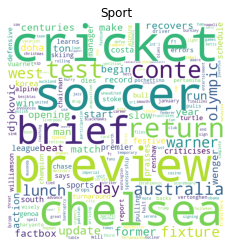

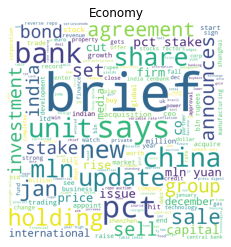

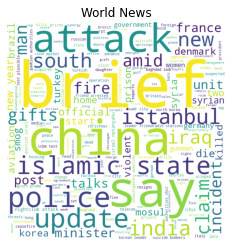

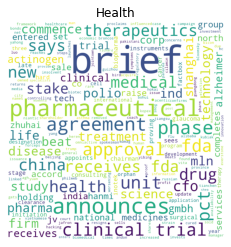

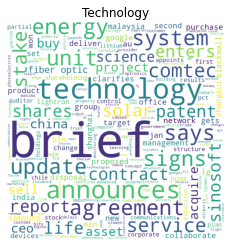

Empty DataFrame
Columns: []
Index: []

In [40]:
df.groupby('category').apply(generate_word_cloud)

In [111]:
word_list = df.headline_text.apply(lambda x: x.split()).sum()
bigrams = pd.DataFrame(map(lambda x: ' '.join(x), nltk.ngrams(word_list, 2)))
bigrams.value_counts()

stake in                   43
pct stake                  22
unit to                    18
mln yuan                   17
agreement with             17
                           ..
good news                   1
gov't cuts                  1
goverment bond              1
government BRIEF-Comtec     1
$1 BRIEF-Advance            1
Length: 7366, dtype: int64

In [42]:
country_agg = pd.read_csv('https://raw.githubusercontent.com/umpirsky/country-list/master/data/en/country.csv')

In [72]:
country_agg['counts'] = country_agg.value.str.lower().apply(lambda y:
    df.headline_text.str.lower().apply(lambda x: y in x).sum()
)

In [82]:
country_agg.sort_values('counts', ascending=False).head(10)
# TODO: plot map

id        value  counts
103  IN        India      64
46   CN        China      64
109  IL       Israel      11
13   AU    Australia      11
30   BR       Brazil      10
200  KR  South Korea       9
106  IQ         Iraq       9
77   FR       France       8
162  KP  North Korea       8
203  LK    Sri Lanka       8

In [5]:
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [6]:
import plotly.express as px

mf = px.data.gapminder().query("year==2007")
fig = px.choropleth(mf, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [4]:
mf

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]